In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


data = pd.read_csv('datasets/internal_pump_leakage.csv')


X = data[['pressure', 'temperature', 'vibration', 'volume_flow', 'Motor_power']]
y = data['internal_pump_leakage']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = XGBClassifier( eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_pred_labels

array([2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0,
       0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1,

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9954648526077098
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.98      1.00      0.99       101
           2       1.00      0.98      0.99       112

    accuracy                           1.00       441
   macro avg       0.99      0.99      0.99       441
weighted avg       1.00      1.00      1.00       441



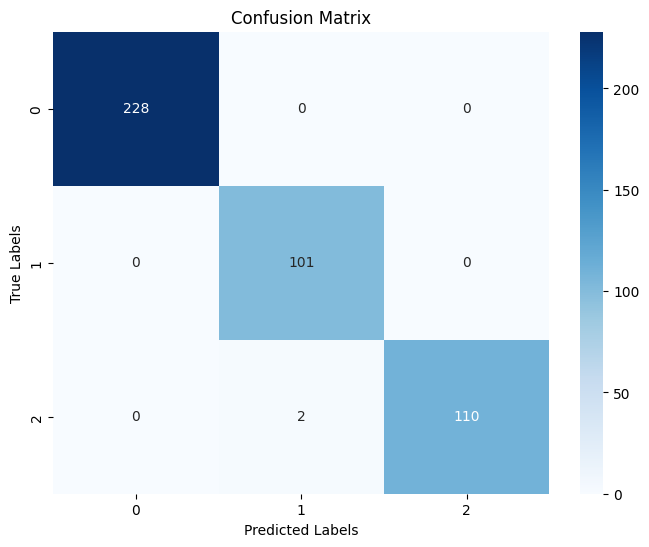

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [19]:
import joblib

joblib.dump(model, 'internal_pump_leakage_model.pkl')
joblib.dump(scaler, 'internal_pump_leakage_scaler.pkl')
joblib.dump(label_encoder, 'internal_pump_leakage_label_encoder.pkl')

['internal_pump_leakage_label_encoder.pkl']